# Stanford CS-229 Spring 2022
### Accompanying implementation by Sebastian Reddy

## Linear Regression

Data is sampled from underlying distribution $ f(\vec{x}) $ but with some noise $ \epsilon $ added. This gives the data as $$ \vec{y}^{(i)} = f(\vec{x}^{(i)}) + \epsilon^{(i)}$$ for $ i = 1,...,n $ for $ n $ samples.
The underlying function is linear so $f$ takes the form $$ f(\vec{x}) = \theta^*_0 + \theta^*_1x_1 + \theta^*_2x_2 = \vec{\theta}^\intercal\vec{x}$$ taking $x \in \mathbb{R}^2$. The vector $\vec{x}$ has appended to it the additional value $x^{(i)}_0 = 1, \,\, \forall i$. So now: $ \vec{\theta}, \vec{x} \in \mathbb{R}^3 $.

The true parameters $ \vec{\theta}^* = (\theta^*_0, \theta^*_1, \theta^*_2)$ are unknown to us. Our goal is to find the best possible approximation to these values given only the dataset (and assuming a linear underlying function). Our best guess is our hypothesis function, parameterised by some vector $\theta$, $$ h_{\theta}(\vec{x}) = \vec{\theta}^\intercal\vec{x} .$$

The "badness" of our hypothesis function is dictated by the error (cost) function $$ J(\vec{\theta}) = \frac{1}{2}\sum^n_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 $$ over the entire data set $\{(x^{(i)}, y^{(i)})\} ,\, i = 1,...,n $. This gives rise to the ordinary least squares regression model.

We can try to find the best possible value of $ \vec{\theta} $ using gradient descent. Given some starting $ \vec{\theta} $ the following update is performed repeatdly, decreasing the cost with every step: $$ \vec{\theta} := \vec{\theta} - \alpha \nabla J(\vec{\theta}) $$. 

Substituting for the specific least mean squares cost function that we are using here, we get the update to be $$ \vec{\theta} := \vec{\theta} + \alpha (y^{(i)} - h_{\theta}^{(i)}(x^{(i)}))\vec{x^{(i)}} $$. For a non trivial dataset, i.e. $ i \gt 1 $ there are 2 main implementations of this algorithm: Batch gradients descent and stochastic gradient descent.

The first considers every datapoint within the dataset at each iteration with the following iterative rule $$ \vec{\theta} := \vec{\theta} - \alpha \sum^{n}_{i=1}(y^{(i)} - h_{\theta}^{(i)}(x^{(i)}))\vec{x^{(i)}} $$ whereas the second runs through the dataset considering one data point per iteration.



### 1D Example

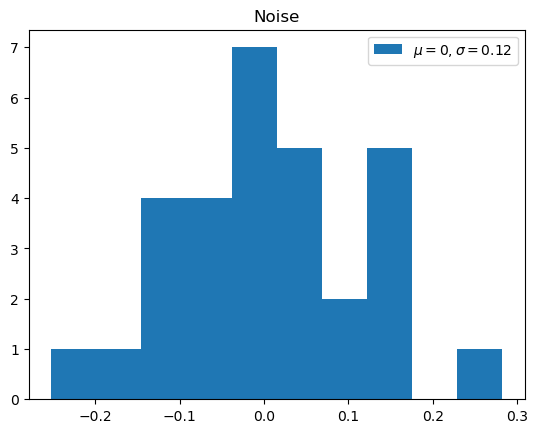

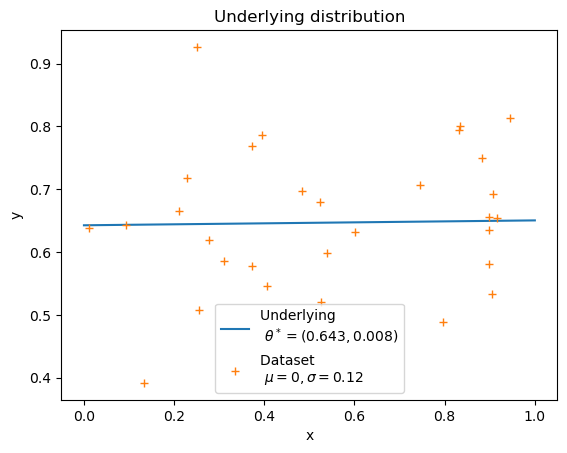

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Defining variables of this run
rng = np.random.default_rng()
theta_star = rng.random(2)  # True underlying distribution
# Noise parameters
mu = 0
sigma = 0.12


# Fuction describing underlying distribution
def f(_x):
    # x = np.vstack((np.ones(np.size(_x)), _x))    # Remembering to append column of ones to the input vector
    return np.dot(theta_star.T, _x)


# Create noise function
def noise(_size):
    return rng.normal(mu, sigma, _size)

# Create dataset from underlying distribution and noise
n = 30  # Dataset size
def create_dataset():
    x = np.sort(rng.uniform(0, 1, n))
    x = np.vstack((np.ones(np.size(x)), x))    # Remembering to append column of ones to the input vector

    y = f(x)
    nse = noise(n)

    # Plot noise
    plt.figure()
    count, bins, _ = plt.hist(nse, 10, density=False, label="$ \mu = {}, \sigma = {} $".format(mu, sigma))
    plt.title("Noise")
    plt.legend()
    plt.show()

    y = y + nse
    #return np.array([x, y]).T
    return np.vstack((x, y)).T
dataset = create_dataset()   

# Plot dataset and true underlying distriubtion
def plot_data():
    x_dist = np.linspace(0, 1, 20)
    x_dist = np.vstack((np.ones(np.size(x_dist)), x_dist))  # Stack column of ones
    y_dist = f(x_dist)
    x_dist = x_dist.T

    plt.figure()
    plt.plot(x_dist[:,1], y_dist, '-', label="Underlying \n $ \\theta^* = ({:.3f}, {:.3f})$".format(theta_star[0], theta_star[1]))
    plt.plot(dataset[:,1], dataset[:,2], '+', label="Dataset \n $ \mu = {}, \sigma = {} $".format(mu, sigma))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Underlying distribution")
    plt.legend()
    plt.show()

    

plot_data()

theta initial: [0.16774679 0.29742452] cost= 0.3632217916835749
theta final: [0.50030585 0.32298529] cost= 0.05606479315696649
theta star: [0.64256491 0.00779195] cost= 0.037381538005748234


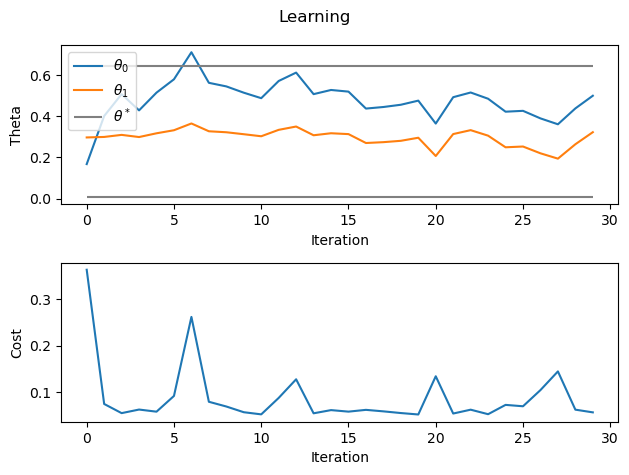

In [57]:
# Stochastic gradient descent


# Define hypothesis h(x)
def h(_theta, _x):
    # x = np.vstack((np.ones(np.size(_x)), _x))    # Remembering to append column of ones to the input vector
    return np.dot(_x, _theta.T)


# Define least mean squares cost function
def cost(_theta):
    x = dataset[:,0:2]
    y = dataset[:,2]

    cost = 0.1 * np.sum(np.power(h(_theta, x) - y, 2))
    return cost

# Define iteration step, given some current parameter vector theta and an index in the dataset i
def step(_theta, _i):
    alpha = 0.5    # Learning rate
    x = dataset[_i,0:2]
    y = dataset[_i,2]

    return _theta + alpha * (y - h(_theta, x)) * x


# Loop over every element in the dataset and increment one step
record = np.empty((n, 3))     # Record of the learning, track values of theta and cost at every iteration

theta = rng.random(2)
print("theta initial:", theta, "cost=", cost(theta))

# Loop over data
for i in range(n):
    curr_cost = cost(theta)
    record[i] = np.append(theta, curr_cost)

    theta = step(theta, i)

final_cost = cost(theta)
record[n-1] = np.append(theta, final_cost)

print("theta final:", theta, "cost=", cost(theta))
print("theta star:", theta_star, "cost=", cost(theta_star))


# Plot training
iters = np.arange(n)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("Learning")

ax1.plot(iters, record[:,0], label="$\\theta_0$")
ax1.plot(iters, record[:,1], label="$\\theta_1$")
ax1.hlines(theta_star, iters[0], iters[-1], colors='grey', label="$\\theta^*$")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Theta")
ax1.legend()

ax2.plot(iters, record[:,2])
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Cost")

fig.tight_layout()
plt.show()

